In [1]:
import tweepy
from tweepy import OAuthHandler
import re
import pickle
  

In [2]:
# load sensitive info
from dotenv import load_dotenv
import os
load_dotenv()
consumer_key = os.getenv('TWITTER_CONSUMER_KEY')
consumer_secret = os.getenv('TWITTER_CONSUMER_SECRET')
access_token = os.getenv('TWITTER_ACCESS_TOKEN')
access_secret = os.getenv('TWITTER_ACCESS_SECRET')

In [3]:
# get api
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [4]:
# read our own timeline
for status in tweepy.Cursor(api.home_timeline).items(10):
    # Process a single status
    print(status.text)

Bicycle speed record smashed at 180 mph - yike! https://t.co/nNfIwvWHS6
RT @VanHooserLab: @vanhoosr Steve got a mention for Peer Review Week from Journal of Neuroscience! https://t.co/a9QQCwQhAG
New job posting added: Princeton University has an opening for human cognitive neuroscience (including, but not lim… https://t.co/3axNKfkmdP
Three faculty job postings in my department @UBiologySchool @UUtah

Mol Biology /  Biochem (deadline 10/1)… https://t.co/foXUm9m3Ds
@carolineleiwee So true - I do the same. Twitter is great but I want to encourage DEEP reading and critical evaluat… https://t.co/ORG8Fg0OMD
Job application reminder: University of Chicago has an opening for neuronal circuits, behavior DUE  https://t.co/NAgcsx6tkq
Job application reminder: University of Oregon has an opening for Motor control, biomechanics, neurophysiology DUE… https://t.co/9EvzwEpA1l
Job application reminder: Virginia Tech has an opening for Developmental psychology and decision neuroscience DUE B… https://t.

In [5]:
# username
user = api.me()
print (user.name)

Xiuye (Sue) Chen


In [5]:
# search for keyword
keyword = "😍" # "😋"
numberOfTweets = 10
for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    print("=====")
    print(tweet.text)

=====
@PRINCES55490064 @Sminxy_Breezy @naledi_hobo @BlackTwittaSA_ @NeshNattie We healthy like that 😂😁😍 https://t.co/ug2L3VEn60
=====
@li_thesudani That’s the best I won’t eat all day knowing I’m going to family’s house for dinner 😂😍
=====
RT @RdenBoer82WX: Todays #Sunset in Brouwershaven, Holland 😍😍😍 @spann @B_Ubiquitous @EarthandClouds @LincsSkies @500pxrtg @DSunsets https:/…
=====
RT @xojessicaa1: I love sex so much, I wanna have sex after we have sex 😫😍 sex sex sex sex
=====
RT @ComradeArif: Like and Retweet this👇
🌸 #EdeDrive 
🌹 #1FIRST 
💚 #1DDrive 
🌻 #GainwithEmi 
❤ #TeamWolFPack 
💘 #FamilyOfLoyals 
🌼 #ThalyDri…
=====
RT @UglyStickkk: ABS-CBN Ball 2018: Focusing on Edward Barber’s youth 

🖇 https://t.co/jCMcFarEoH 
 🖇 https://t.co/0AGwYNM8vt 

Article abo…
=====
RT @ohsshari: I love when series don’t wait a long time to drop the next season. With that being said… STAR IS IN LIKE A WEEK FOLKS🙌🏽🙌🏽🙌🏽😍
=====
Bad bitch super thick
That's the way he like it 😜😩😍 https://t.co/FGTr5lKVps
=

In [6]:
print(tweet._json)

{'created_at': 'Tue Sep 18 19:01:48 +0000 2018', 'id': 1042126562349510656, 'id_str': '1042126562349510656', 'text': 'RT @ErnieGnc: Damn.😩😍😍 https://t.co/ourJ3h68ln', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'ErnieGnc', 'name': 'Ernie', 'id': 760227676577607681, 'id_str': '760227676577607681', 'indices': [3, 12]}], 'urls': [], 'media': [{'id': 1041881063700742144, 'id_str': '1041881063700742144', 'indices': [23, 46], 'media_url': 'http://pbs.twimg.com/ext_tw_video_thumb/1041881063700742144/pu/img/C9DWD_j87IBjCwUV.jpg', 'media_url_https': 'https://pbs.twimg.com/ext_tw_video_thumb/1041881063700742144/pu/img/C9DWD_j87IBjCwUV.jpg', 'url': 'https://t.co/ourJ3h68ln', 'display_url': 'pic.twitter.com/ourJ3h68ln', 'expanded_url': 'https://twitter.com/ErnieGnc/status/1041881188741382145/video/1', 'type': 'photo', 'sizes': {'large': {'w': 480, 'h': 600, 'resize': 'fit'}, 'small': {'w': 480, 'h': 600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h

In [7]:
dc = tweet._json
print(dc.keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [41]:
str = dc.get('text')
print(str)

import re
s2 = re.split('( )', str) # this is a list
print(s2)
#print(s2.startswith('@'))
#[ t for t in s2 if t.startswith('s') ]
print(re.findall(r'[@]\S*', str))
print(re.findall(r'[RT]\S*', str))

RT @ErnieGnc: Damn.😩😍😍 https://t.co/ourJ3h68ln
['RT', ' ', '@ErnieGnc:', ' ', 'Damn.😩😍😍', ' ', 'https://t.co/ourJ3h68ln']
['@ErnieGnc:']
['RT']


In [9]:
from time import sleep
from datetime import datetime
from textblob import TextBlob #For Sentiment Analysis
import matplotlib.pyplot as plt


In [11]:
polarity_list = []
numbers_list = []
number = 1

In [12]:
# search for keyword
keyword = "cake"
numberOfTweets = 10
for tweet in tweepy.Cursor(api.search, keyword, lang="en").items(numberOfTweets):
    try:
        analysis = TextBlob(tweet.text)
        analysis = analysis.sentiment
        polarity = analysis.polarity
        polarity_list.append(polarity)
        numbers_list.append(number)
        number = number + 1
    except tweepy.TweepError as e:
        print(e.reason)

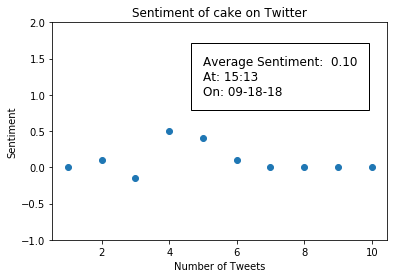

In [27]:
axes = plt.gca()
axes.set_ylim([-1, 2])
plt.scatter(numbers_list, polarity_list)

averagePolarity = (sum(polarity_list))/(len(polarity_list))
averagePolarity = "{0:.2f}".format(averagePolarity)
#averagePolarity = "{0:.0f}%".format(averagePolarity * 100)
time  = datetime.now().strftime("At: %H:%M\nOn: %m-%d-%y")
plt.text(5, 1, "Average Sentiment:  " + str(averagePolarity) + "\n" + time, fontsize=12, bbox = dict(facecolor='none', edgecolor='black', boxstyle='square, pad = 1'))

plt.title("Sentiment of " + keyword + " on Twitter") 
plt.xlabel("Number of Tweets")
plt.ylabel("Sentiment")
plt.show()